<a href="https://colab.research.google.com/github/Avery1493/DS-Unit-2-Applied-Modeling/blob/master/module2-wrangle-ml-datasets/Quinn_232_LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [131]:
'''
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    # Read New York City property sales data
import pandas as pd
df = pd.read_csv(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')
'''

"\n%%capture\nimport sys\n\n# If you're on Colab:\nif 'google.colab' in sys.modules:\n    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'\n    !pip install category_encoders==2.*\n    !pip install pandas-profiling==2.*\n\n# If you're working locally:\nelse:\n    DATA_PATH = '../data/'\n    # Read New York City property sales data\nimport pandas as pd\ndf = pd.read_csv(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')\n"

In [132]:
#Imports
import numpy as np
import pandas as pd
pd.options.display.max_columns=200
pd.options.display.max_rows=200

#Loading Data
Q3 = pd.read_csv('https://raw.githubusercontent.com/Avery1493/Lending-Club/master/Data/LC2019Q3_Paid_or_Charged_Off')
Q4 = pd.read_csv('https://raw.githubusercontent.com/Avery1493/Lending-Club/master/Data/LC2019Q4_Paid_or_Charged_Off')

#Combining Data Sets
df = pd.concat([Q3,Q4])
print(df.shape)
df.sample(5)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(11484, 150)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
3053,159607924,NaN,3600,3600,3600.0,36 months,17.74%,129.68,C,C5,NaN,NaN,RENT,14796.0,Not Verified,Oct-2019,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,339xx,FL,27.09,0,Apr-2008,675,679,1,NaN,NaN,6,0,4546,56.1%,9,w,0.0,0.0,3602.942840,3602.94,3600.0,2.94,0.0,0.0,0.0,Oct-2019,3606.49,NaN,Sep-2019,679,675,0,NaN,1,Individual,NaN,NaN,NaN,0,94,10639,1,1,0,0,28.0,6093,61.0,3,4,0,59.0,8100,0,3,3,4,1773.0,NaN,NaN,0,0,45.0,137,1,1,0,NaN,NaN,1.0,NaN,0,0,5,0,0,3,5,6,5,6,0.0,0,0,3,100.0,NaN,0,0,18100,10639,0,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1418,158226498,NaN,2000,2000,2000.0,36 months,7.56%,62.27,A,A3,Financial service representative,2 years,MORTGAGE,34000.0,Source Verified,Sep-2019,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,891xx,NV,19.65,0,Dec-2013,740,744,0,33.0,NaN,9,0,1038,4.3%,15,w,0.0,0.0,2032.028537,2032.03,2000.0,32.03,0.0,0.0,0.0,Nov-2019,1970.60,NaN,Jan-2020,659,655,0,NaN,1,Individual,NaN,NaN,NaN,0,0,174747,1,3,2,3,4.0,12067,76.0,1,2,282,33.0,24000,3,3,3,7,19416.0,12118.0,2.3,0,0,41.0,69,10,4,2,23.0,33.0,1.0,33.0,0,1,3,2,4,6,5,7,3,9,0.0,0,0,3,86.7,0.0,0,0,196688,13105,12400,15938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1403,161282432,NaN,1000,1000,1000.0,36 months,17.74%,36.03,C,C5,sales,5 years,RENT,21000.0,Not Verified,Nov-2019,Fully Paid,n,https://

Your code starts here:

In [133]:
#Target Baseline
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.962818
Charged Off    0.037182
Name: loan_status, dtype: float64

In [0]:
# Get Pandas Profiling Report
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df)
# profile.to_file(outputfile='Lending_Club_Profile_Report.html')

In [0]:
columns = ['funded_amnt','funded_amnt_inv','loan_amnt','total_rec_prncp',
           'total_rec_int','installment','total_pymnt_inv','total_pymnt',
           'loan_status']

In [136]:
#Deleting duplicate and highly correlated columns
df[columns].sample(5)

,funded_amnt,funded_amnt_inv,loan_amnt,total_rec_prncp,total_rec_int,installment,total_pymnt_inv,total_pymnt,loan_status
5723,21275,21275.0,21275,21275.0,655.10,790.66,21930.10,21930.104363,Fully Paid
775,2000,2000.0,2000,2000.0,33.29,65.50,2033.29,2033.287110,Fully Paid
4310,6400,6400.0,6400,6400.0,73.73,219.68,6473.73,6473.728889,Fully Paid
5790,15000,15000.0,15000,15000.0,178.12,418.56,15178.12,15178.125000,Fully Paid
6848,21050,21050.0,21050,21050.0,993.41,472.52,22043.41,22043.406277,Fully Paid


In [0]:
columns = ['pymnt_plan','out_prncp','out_prncp_inv','collection_recovery_fee',
           'next_pymnt_d','tax_liens','hardship_flag','hardship_type','deferral_term']

In [138]:
#Deleting all columns with constant or missing values
df[columns].sample(5)

,pymnt_plan,out_prncp,out_prncp_inv,collection_recovery_fee,next_pymnt_d,tax_liens,hardship_flag,hardship_type,deferral_term
1352,n,0.0,0.0,0.0,NaN,0,N,NaN,NaN
2978,n,0.0,0.0,0.0,NaN,0,N,NaN,NaN
5872,n,0.0,0.0,0.0,NaN,0,N,NaN,NaN
8221,n,0.0,0.0,0.0,NaN,0,N,NaN,NaN
1771,n,0.0,0.0,0.0,NaN,0,N,NaN,NaN


In [139]:
#Deleting column that's can only present in class 
df[df['recoveries'] >0]['loan_status'].sample(8)

7493    Charged Off
6555    Charged Off
3054    Charged Off
3510    Charged Off
2165    Charged Off
192     Charged Off
1856    Charged Off
6540    Charged Off
Name: loan_status, dtype: object

In [140]:
#Contains future dates
df['last_credit_pull_d']

0       Jan-2020
1       Jan-2020
2       Jan-2020
3       Jan-2020
4       Feb-2020
          ...   
3070    Jan-2020
3071    Dec-2019
3072    Jan-2020
3073    Nov-2019
3074    Sep-2019
Name: last_credit_pull_d, Length: 11484, dtype: object

# Wrangling Date

FEATURE IDEAS

*   Installment  % of income
*   Group Job Titles
*   Emp length Range
*   List item




In [0]:
#Stripping
df['term'] = df['term'].str.strip(' months')
df['int_rate'] = df['int_rate'].str.strip('%')
df['revol_util'] = df['revol_util'].str.strip('%')

#Combining 
df['FICO'] = df[['fico_range_low','fico_range_high']].mean(axis=1)
df['Last_FICO'] = df[['last_fico_range_low','last_fico_range_high']].mean(axis=1)
#installment

#Dropping
df = df.drop(['member_id','url','desc','zip_code', 'fico_range_low',
              'fico_range_high','hardship_flag','hardship_type',
              'hardship_reason','hardship_status','deferral_term',
              'hardship_amount','hardship_start_date','hardship_end_date',
              'payment_plan_start_date','hardship_length','hardship_dpd',
              'hardship_loan_status','next_pymnt_d',
              'orig_projected_additional_accrued_interest',
              'hardship_payoff_balance_amount',
              'hardship_last_payment_amount','funded_amnt','funded_amnt_inv',
              'total_rec_prncp','total_rec_int','total_pymnt_inv','total_pymnt',
              'pymnt_plan','recoveries','delinq_amnt','tax_liens',
              'pub_rec_bankruptcies','deferral_term','settlement_status',
              'settlement_date','settlement_amount','settlement_percentage',
              'settlement_term','il_util','bc_util','sec_app_revol_util',
              'last_fico_range_low','last_fico_range_high',
              'last_credit_pull_d'], axis = 1)

#Missing
df = df.fillna(np.NaN)
#Datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])


In [178]:
print(df.shape)
df.sample(3)

(11484, 108)


,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,debt_settlement_flag,debt_settlement_flag_date,FICO,Last_FICO
4736,156026261,21275,36,20.00,790.66,D,D2,LETTER CARRIER,10+ years,MORTGAGE,72000.0,Source Verified,2019-08-01,Fully Paid,other,Other,CA,32.48,0,1989-04-01,0,NaN,110.0,9,1,10627,35.7,16,f,0.0,0.0,0.0,0.0,Nov-2019,21052.94,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33453,1,2,2,2,6.0,22826,0,0,8937,48.0,29800,1,2,1,2,3717.0,14437.0,0,168.0,363,27,6,0,35.0,NaN,12.0,NaN,0,4,6,4,4,6,7,10,6,9,0.0,0,0,2,100.0,50.0,69800,33453,25000,40000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,717.0,682.0
6101,155541999,11050,36,11.71,365.49,B,B3,Senior Engineer,10+ years,MORTGAGE,19000.0,Not Verified,2019-07-01,Fully Paid,debt_consolidation,Debt consolidation,CA,20.91,0,2007-07-01,1,NaN,NaN,15,0,10284,19,35,w,0.0,0.0,0.0,0.0,Aug-2019,4128.40,0,NaN,1,Joint App,139000.0,15.42,Not Verified,0,0,134912,2,5,1,1,4.0,124628,2,2,6681,57.0,54100,0,0,1,3,8994.0,38862.0,0,141.0,144,4,4,0,4.0,NaN,4.0,NaN,0,4,5,7,14,7,10,28,5,15,0.0,0,0,3,97.1,28.6,181487,134912,48300,127387,47750.0,720.0,724.0,Jul-2001,0.0,6.0,10.0,2.0,18.0,0.0,0.0,NaN,N,NaN,732.0,707.0
180,159313653,6000,36,7.02,185.32,A,A2,Cashier,6 years,RENT,30000.0,Not Verified,2019-09-01,Fully Paid,other,Other,WA,1.76,0,2007-06-01,0,NaN,NaN,8,0,173,0.5,19,w,0.0,0.0,0.0,0.0,Dec-2019,5755.81,0,NaN,1,Individual,NaN,NaN,NaN,0,0,173,1,0,1,1,7.0,0,1,2,19,1.0,32500,0,3,0,3,25.0,13981.0,0,118.0,147,3,3,2,42.0,NaN,NaN,NaN,0,1,2,3,3,6,8,11,2,8,0.0,0,0,2,100.0,0.0,32500,173,14000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,797.0,777.0


In [125]:
train = df[df['issue_d'].dt.month <= 8]
val = df[(df['issue_d'].dt.month >8) & (df['issue_d'].dt.month <11)]
test = df[df['issue_d'].dt.month >= 11]

train.shape, val.shape, test.shape

((6450, 108), (3485, 108), (1549, 108))

In [126]:
print('TRAIN:')
print(train['loan_status'].value_counts(normalize=True))
print('VAL:')
print(val['loan_status'].value_counts(normalize=True))
print('TEST:')
print(test['loan_status'].value_counts(normalize=True))

TRAIN:
Fully Paid     0.946357
Charged Off    0.053643
Name: loan_status, dtype: float64
VAL:
Fully Paid     0.979053
Charged Off    0.020947
Name: loan_status, dtype: float64
TEST:
Fully Paid     0.994835
Charged Off    0.005165
Name: loan_status, dtype: float64


In [127]:
target = 'loan_status'
features = train.columns.drop([target, 'id','issue_d','earliest_cr_line'])

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

features.value_counts().sum()

104

# Decision Tree

In [157]:
!pip install category_encoders
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(max_depth=5)
)

pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_val)

In [158]:
#BALANCED ACCURACY SCORE
balanced_accuracy_score(y_val,y_pred)

0.8491685268753313

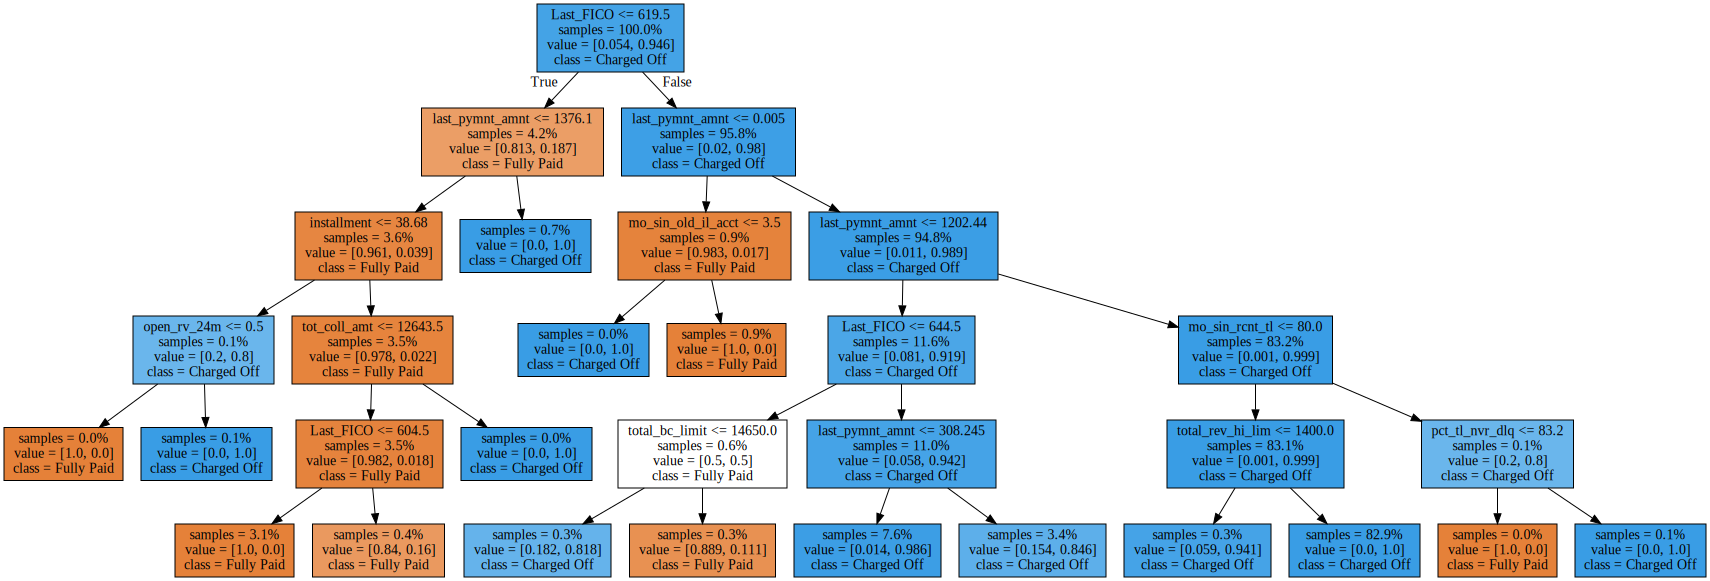

In [159]:
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file = None,
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    impurity=False, 
    proportion=True
)

graphviz.Source(dot_data)

# Random Forest

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=100, max_depth=15,
                           n_jobs=-1)
)

pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_val)

In [177]:
#BALANCED ACCURACY SCORE
balanced_accuracy_score(y_val,y_pred)

0.8560178419438244